In [16]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import plotly.express as px

In [17]:
# Read in myonuclear data (.csv)
df = pd.read_csv(r"D:\MacroOutput Test\Manuscript Figures\20\D14\R\20_D14_R_Fiber1-1_output\20_D14_R_Fiber1-1_all_nuclei.csv")
df.head()

,Subject,Timepoint,Side,Fiber,FiberType,Label,Area_px,Perimeter_px,Centroid_Y,Centroid_X,...,IncludedByArea,Mean_Z_um,Z_Std_Index,IncludedByZ,Included,Skeleton_Angle_deg,Relative_Angle_deg,DistanceToSkel,Cluster3D,Unnamed: 31
0,20,D14,R,1,1,1,390,77.012193,610.771795,512.448718,...,True,52.421538,1.652277,True,True,5.593651,68.190217,82.829622,-1,NaN
1,20,D14,R,1,1,2,748,100.325902,673.159091,592.076203,...,True,46.672460,1.612441,True,True,5.593651,89.331396,52.784721,-1,NaN
2,20,D14,R,1,1,8,511,83.840620,789.589041,604.536204,...,True,46.539335,1.309568,True,True,5.593651,22.008617,17.531850,-1,NaN
3,20,D14,R,1,1,9,705,106.426407,821.584397,436.971631,...,True,67.442553,1.403481,True,True,5.593651,84.037197,68.796169,-1,NaN
4,20,D14,R,1,1,11,483,86.083261,844.722567,1000.035197,...,True,63.514286,1.734127,True,True,26.706336,24.864392,44.750311,-1,NaN


In [19]:
# Inspect columns
df.columns

Index(['Subject', 'Timepoint', 'Side', 'Fiber', 'FiberType', 'Label',
       'Area_px', 'Perimeter_px', 'Centroid_Y', 'Centroid_X', 'MajorAxis_px',
       'MinorAxis_px', 'Orientation_rad', 'Aspect_Ratio', 'Orientation_deg',
       'Shape_Class', 'Area_um2', 'Perimeter_um', 'MajorAxis_um',
       'MinorAxis_um', 'Centroid_X_um', 'Centroid_Y_um', 'IncludedByArea',
       'Mean_Z_um', 'Z_Std_Index', 'IncludedByZ', 'Included',
       'Skeleton_Angle_deg', 'Relative_Angle_deg', 'DistanceToSkel',
       'Cluster3D', 'Unnamed: 31'],
      dtype='object')

In [20]:
# We will run DBSCAN clustering on X-Y-Z coordinates (in microns)
coord = df[['Centroid_X_um', 'Centroid_Y_um', 'Mean_Z_um']].copy()
coord.head()

,Centroid_X_um,Centroid_Y_um,Mean_Z_um
0,168.674135,201.037491,52.421538
1,194.883777,221.572469,46.672460
2,198.985026,259.895760,46.539335
3,143.830611,270.427133,67.442553
4,329.164785,278.043136,63.514286


In [37]:
# Run DBSCAN clustering 
dbscan = DBSCAN(eps=20, min_samples=2) # eps in microns; min_samples = 2 or more
coord['Cluster'] = dbscan.fit_predict(coord) # Add cluster labels to the DataFrame

# Convert cluster labels to string/categorical for distinct colors in Plotly
coord['Cluster'] = coord['Cluster'].astype(str)

coord

,Centroid_X_um,Centroid_Y_um,Mean_Z_um,Cluster
0,168.674135,201.037491,52.421538,-1
1,194.883777,221.572469,46.672460,-1
2,198.985026,259.895760,46.539335,-1
3,143.830611,270.427133,67.442553,-1
4,329.164785,278.043136,63.514286,-1
...,...,...,...,...
460,2156.393324,1021.821406,66.020763,-1
461,2340.328030,1028.299910,76.367285,-1
462,2185.628323,1024.096810,83.215086,-1
463,2282.889144,1025.232902,70.203568,-1


In [38]:
# Inspect cluster sizes
coord['Cluster'].value_counts()

Cluster
-1    365
19      5
1       4
2       4
38      4
35      3
27      3
16      3
14      3
33      3
36      2
34      2
24      2
32      2
31      2
37      2
30      2
39      2
29      2
28      2
40      2
41      2
26      2
25      2
21      2
23      2
10      2
3       2
4       2
5       2
6       2
7       2
8       2
9       2
11      2
22      2
12      2
13      2
15      2
17      2
18      2
20      2
0       2
42      2
Name: count, dtype: int64

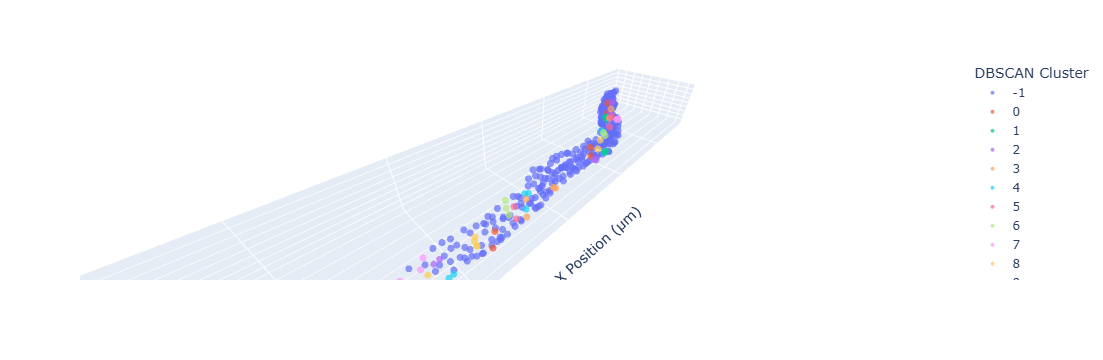

In [50]:
fig = px.scatter_3d(coord, 
                    x='Centroid_X_um', 
                    y='Centroid_Y_um', 
                    z='Mean_Z_um', 
                    color='Cluster', 
                    labels={
                        "Centroid_X_um": "X Position (µm)",
                        "Centroid_Y_um": "Y Position (µm)",
                        "Mean_Z_um": "Z Position (µm)",
                        "Cluster": "DBSCAN Cluster"  # Sets the legend title
                    },
                    # Use color_discrete_sequence for categorical data
                    color_discrete_sequence=px.colors.qualitative.Plotly)
                    
fig.update_traces(marker=dict(size=4, opacity=0.7))
fig.update_layout(scene=dict(aspectratio=dict(x=5, y=1, z=.5), 
                                   xaxis = dict(showticklabels = False),
                                   yaxis = dict(showticklabels = False),
                                   zaxis = dict(showticklabels = False)))

fig.show()